# Úloha 1
* Majme tabuľku nameraných dát. Nájdite polynóm stupňa n ≤ n_max, ktorý najlepšie
aproximuje funkčnú závislosť y(t) v zmysle (neváženej) metódy najmenších štvorcov.
Zobrazte závislosť rezíduí, t.j. súčet štvorcov, na stupni polynómu pre všetky skúmané
polynómy.

* Porovnajte výsledky s výsledkami obdŕžanými využitím zabudovanej fitovacej
funkcie polyfit

Data:

```py
t_i = [2 2.5 3 3.5 4 4.5 5]
y_i = [7.14 6.56 5.98 5.55 5.71 6.01 6.53]
```

## Teoretický úvod

Cielom LS metódy je dosiahnúť takú aproximačnú funkciu, ktorá sa najbližšie modeluje namerané dáta. Narozdiel napríklad od interpolácie splajnami, pri LS nie je potrebné aby funkcia prechádzala nameraními bodmy, metóda je založená na minimalizacií súčtu vzdialenosti štvorcou medzi skutočnou hodnotou a aproximačnou funkciou. 

Uveďme príklad ak máme dva namerané body[^1]

Zvoľme aproximačnú funkciu $\varphi(x_i)=a_0 + a_1x$. Teraz odčítajme hodnotu $\varphi(x_i)$ od skutočnej nameranej hodnoty $y_i$. Dostávame $a_0 + a_1x - y_i$, vezmime štvorec tejto hodnoty $(a_0 + a_1x_i - y_i)^{2}$, to spravíme pre každú hodnotu. Následne sčítame takto získané hodnoty, chceme aby suma mocnín vzdialeností (residue) bola čo najmenšia $R=\sum_{i=0}^{n}(a_0 + a_1x_i -y_i)^{2}$. Máme definovanú minimalizačnú úlohu, pre lokálne extrémy platí, že derivácia je rovná nule. Najprv zderivujeme podľa $a_0$ a upravíme:
$$2\sum_{i=0}^{n}(a_0 + a_1x_i -y_i)=0$$
$$2(a_0n + a_1\sum_{i=0}^{n}x_i -\sum_{i=0}^{n}y_i)=0$$
$$a_0n + a_1\sum_{i=0}^{n}x_i =\sum_{i=0}^{n}y_i$$
Nasledne zderivujeme podla $a_1$:
$$2\sum_{i=0}^{n}(a_0 + a_1x_i -y_i)x_i=0$$
$$2(a_0\sum_{i=0}^{n}x_i + a_1\sum_{i=0}^{n}x_i^{2} -\sum_{i=0}^{n}y_ix_i)=0$$
$$a_0\sum_{i=0}^{n}x_i + a_1\sum_{i=0}^{n}x_i^{2}=\sum_{i=0}^{n}y_ix_i$$
Dostávame sústavu rovníc, môžeme zapísať v maticovom tvare:
$$\begin{pmatrix} n & \sum_{i=0}^{n}x_i  \\ \sum_{i=0}^{n}x_i & \sum_{i=0}^{n}x_i^{2}   \end{pmatrix}\begin{pmatrix} a_0 \\ a_1 \end{pmatrix}=\begin{pmatrix} \sum_{i=0}^{n}y_i \\ \sum_{i=0}^{n}y_ix_i\end{pmatrix} $$

Všeobecne platí:

$$\begin{pmatrix}  n &   \dots &\sum_{i=0}^{n}x_i^{k} \\  \vdots & \ddots & \\ \sum_{i=0}^{n}x_i^{k} &        & \sum_{i=0}^{n}x_i^{2k}  \end{pmatrix} \begin{pmatrix}  a_0  \\ \vdots \\ a_{i} \end{pmatrix}=\begin{pmatrix}  \sum_{i=0}^{n}y_i \\ \vdots \\ \sum_{i=0}^{n}y_ix_i^{k} \end{pmatrix}$$
  
Dostávame maticovú rovnicu v tvare $\mathbf{V}a= \mathbf{Y}$, kde riešením dostávame a vektor, kde elementy sú hľadané najmenšie konštanty pre aproximačný polynóm. 

### Popis programu



[^1]:V skutočnosti je nezmyselné robiť aproximáciu z dvoch bodov kvôli podmienenosti ale pre n bodov už $\LaTeX$-ove rovnice sú prilíš zdlhavé na písanie.

In [2]:
#declares plotting env for jupyter octave kernel
graphics_toolkit ("qt");

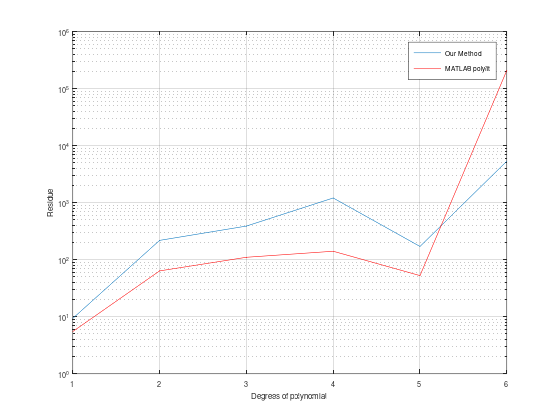

In [10]:
#Released under MIT License 
#Copyright (c) 2022 Miroslav Kurka

t_i = [2 2.5 3 3.5 4 4.5 5]; # t_i is our x_i value
y_i = [7.14 6.56 5.98 5.55 5.71 6.01 6.53];
residues=[];
#n= length(t_i) 
n=columns(t_i);
k= n-1; # degree of the polynomial
# init matrices
V=zeros(n,n);
Y=zeros(n,1);


    
# fill Y matrix

for i=1:n
   Y(i)=sum(y_i.*(t_i.^(i-1))); # i-1 so we can get t_i^0 = 1, hence the n not k in the for loop range
endfor

# fill the V matrix
    
for i=1:n
  for j=1:n
    if i==1 && j==1
      V(i,j)=k;
    else
      V(i,j)=sum(t_i.^(i+j)-2);
    endif
    endfor
endfor
    

st=7;
# get each degree polynomial by slicing the V 
for pos=1:st
    if st-pos==0, break; end # end for loop since 0x0 doesnt exist, and indexing is nightmare in matlab
    V=V(1:st-pos,1:st-pos); # reverse slicing, we reduce matrix from to 6x6 to 5x5 ...
    Y=Y(1:st-pos);
    a_coefficients=V\Y;
    lst_func=polyval(flip(a_coefficients),y_i);
    residues(pos)= sum((y_i-lst_func).^2);
endfor
# flip the residues since by slicing we got 6x6 ie k=6 first 
residues=flip(residues);
poly_degrees=(1:k);
semilogy(poly_degrees,residues)
grid on
hold on


# task b) compare with polyfit 

matlab_residues=[];

for i=1:6
    a_matlab_coefficients=polyfit(t_i,y_i,i);
    mat_func=polyval(a_matlab_coefficients,y_i);
    matlab_residues(i)=sum((y_i-mat_func).^2);
endfor

semilogy(poly_degrees, matlab_residues,"red")
legend("Our Method","MATLAB polyfit")
xlabel("Degrees of polynomial")
ylabel("Residue")
hold off
         


### Záver

Z grafu je viditeľné, že najlepší "fit" je pri polynóme so stupnňom 5 v oboch prípadoch. Taktiež, je zretelné, že implementovaná funkcia v MATLAB knižnici je presnejšia. Dôvodom je najskôr optimalnejšia implementácia algoritmu LSM alebo výber iného "fitovacieho" algoritmu. 